In [37]:
from fetcher import get_team_data
from team_manipulator import get_team_form, get_teams_stats_table
from fixtures import get_fixtures, get_next_fixtures, short_name, get_next_team, draw_scatter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
LAST_GAMEWEEK = 4
CURRENT_GAMEWEEK = 30

plt.rcParams["figure.figsize"] = (20,10)

In [39]:
a, b = get_teams_stats_table(teams=get_team_data(), buffer=CURRENT_GAMEWEEK, last_check=LAST_GAMEWEEK, h_a="")
teams = get_team_form(a,b)
teams_df = pd.DataFrame(teams)
teams_df

,name,scored_mean,xg_mean,scored_rank,xg_rank,allowed_mean,xga_mean,allowed_rank,xga_rank
0,ARS,3.50,2.484375,1,1,1.00,1.012635,5,5
1,MCI,2.75,2.400565,2,3,0.50,0.339070,2,1
2,NEW,2.75,2.424043,3,2,0.75,0.941186,4,3
3,AVL,2.25,1.662326,4,8,0.25,0.946107,1,4
4,LEE,2.25,1.295432,5,12,2.25,2.046714,19,18
5,TOT,2.25,1.401365,6,11,1.50,1.611919,12,12
6,LIV,2.00,1.524432,7,9,1.25,1.785071,6,14
7,BHA,1.75,2.129409,8,4,1.25,1.060170,8,6
8,BRE,1.25,1.116367,9,15,1.75,1.852175,15,15
9,WOL,1.25,1.114592,10,16,1.75,1.509972,17,10


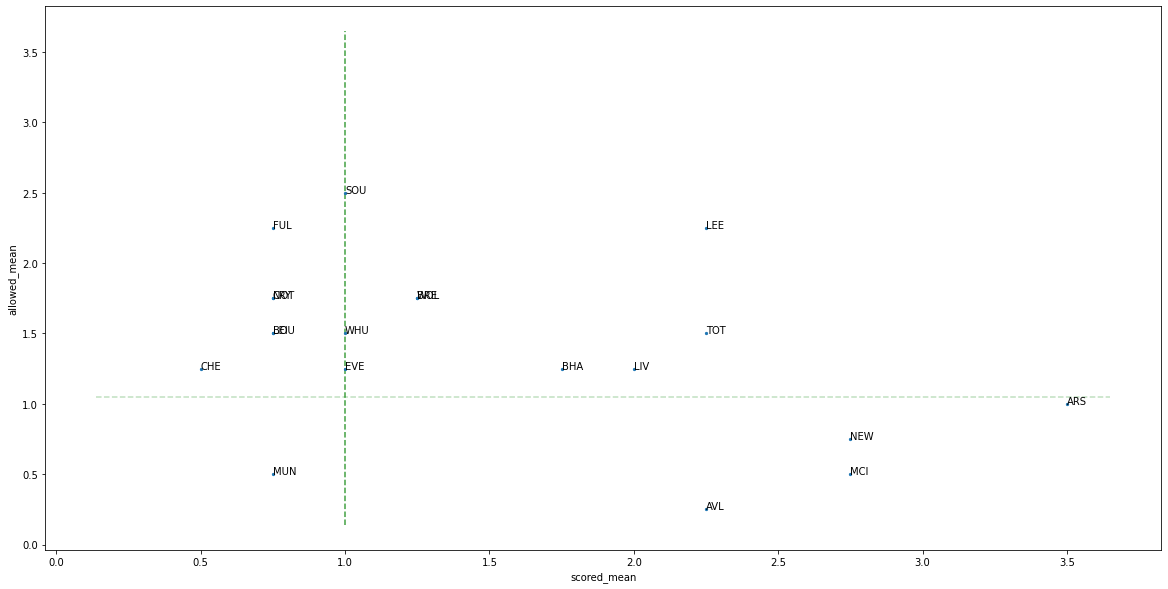

In [40]:
# Plot Form Goals - Conceded
plot_form = teams_df[['scored_mean', 'allowed_mean']].plot.scatter(x='scored_mean', y='allowed_mean',marker=".")

lims = [
    np.min([plot_form.get_xlim(), plot_form.get_ylim()]),  # min of both axes
    np.max([plot_form.get_xlim(), plot_form.get_ylim()]),  # max of both axes
]

plot_form.plot([1,1], lims, 'g--', alpha=0.75, zorder=0)
plot_form.plot(lims, [1.05,1.05], 'g--', alpha=0.25, zorder=0)
for i, txt in enumerate(teams_df['name']):
    plot_form.annotate(txt, (teams_df['scored_mean'][i], teams_df['allowed_mean'][i]))

In [41]:
# Plot Form xG - xGA
# plot_form = teams_df[['xg_mean', 'xga_mean']].plot.scatter(x='xg_mean', y='xga_mean',marker=".")

# lims = [
#     np.min([plot_form.get_xlim(), plot_form.get_ylim()]),  # min of both axes
#     np.max([plot_form.get_xlim(), plot_form.get_ylim()]),  # max of both axes
# ]

# plot_form.plot([1,1], lims, 'g--', alpha=0.75, zorder=0)
# plot_form.plot(lims, [1.05,1.05], 'g--', alpha=0.25, zorder=0)
# for i, txt in enumerate(teams_df['name']):
#     plot_form.annotate(txt, (teams_df['xg_mean'][i], teams_df['xga_mean'][i]))

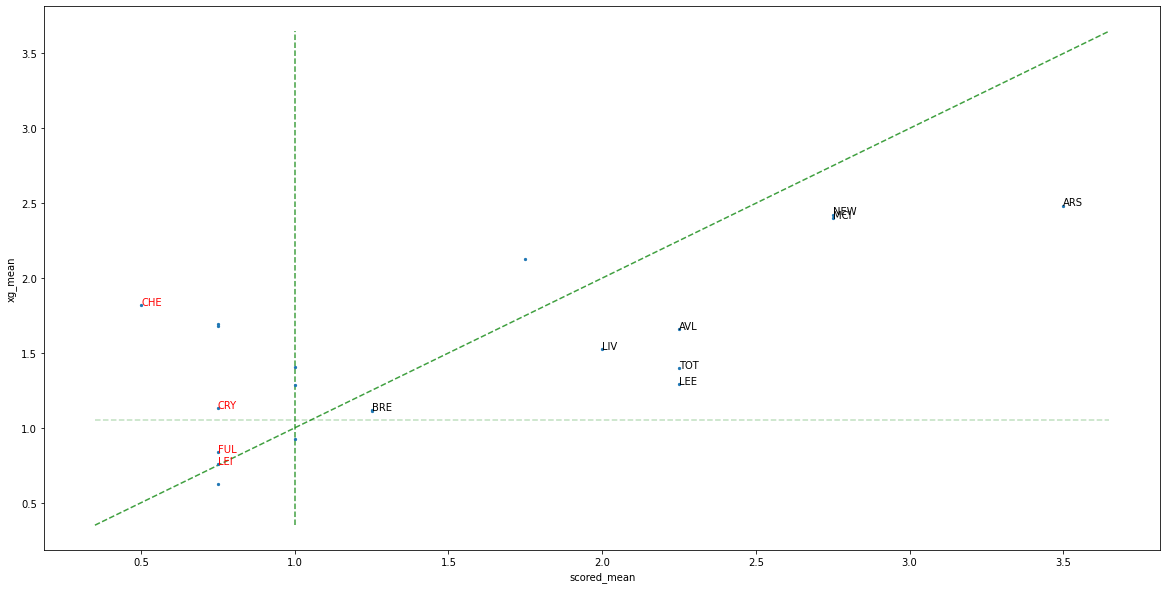

In [48]:
# Plot Form G - xG
plot_form = teams_df[['scored_mean', 'xg_mean']].plot.scatter(x='scored_mean', y='xg_mean',marker=".")

lims = [
    np.min([plot_form.get_xlim(), plot_form.get_ylim()]),  # min of both axes
    np.max([plot_form.get_xlim(), plot_form.get_ylim()]),  # max of both axes
]

plot_form.plot([1,1], lims, 'g--', alpha=0.75, zorder=0)
plot_form.plot(lims, [1.05,1.05], 'g--', alpha=0.25, zorder=0)
plot_form.plot(lims, lims, 'g--', alpha=0.75, zorder=0)
for i, txt in enumerate(teams_df['name']):
    if (teams_df['scored_mean'][i] > teams_df['xg_mean'][i]) & (teams_df['scored_rank'][i] < 10):
        plot_form.annotate(txt, (teams_df['scored_mean'][i], teams_df['xg_mean'][i]))
    if (teams_df['scored_mean'][i] < teams_df['xg_mean'][i]) & (teams_df['scored_rank'][i] > 15):
        plot_form.annotate(txt, (teams_df['scored_mean'][i], teams_df['xg_mean'][i]), color='red')

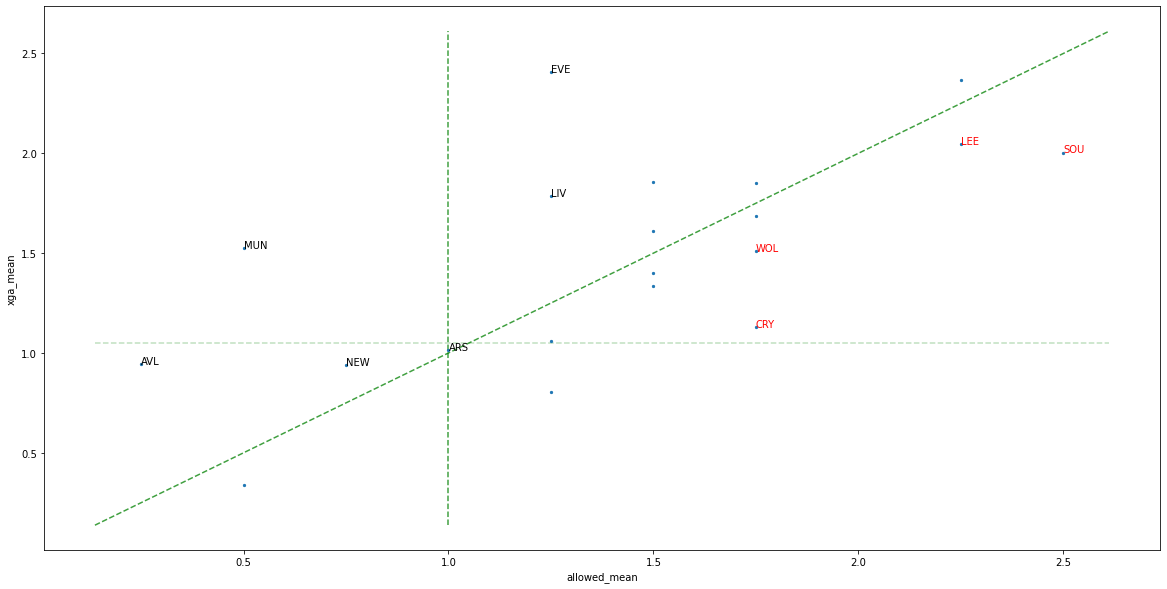

In [51]:
# Plot Form GA - xGA
plot_form = teams_df[['allowed_mean', 'xga_mean']].plot.scatter(x='allowed_mean', y='xga_mean',marker=".")

lims = [
    np.min([plot_form.get_xlim(), plot_form.get_ylim()]),  # min of both axes
    np.max([plot_form.get_xlim(), plot_form.get_ylim()]),  # max of both axes
]

plot_form.plot([1,1], lims, 'g--', alpha=0.75, zorder=0)
plot_form.plot(lims, [1.05,1.05], 'g--', alpha=0.25, zorder=0)
plot_form.plot(lims, lims, 'g--', alpha=0.75, zorder=0)
for i, txt in enumerate(teams_df['name']):
    if (teams_df['allowed_mean'][i] < teams_df['xga_mean'][i]) & (teams_df['allowed_rank'][i] < 10):
        plot_form.annotate(txt, (teams_df['allowed_mean'][i], teams_df['xga_mean'][i]))
    if (teams_df['allowed_mean'][i] > teams_df['xga_mean'][i]) & (teams_df['allowed_rank'][i] > 15):
        plot_form.annotate(txt, (teams_df['allowed_mean'][i], teams_df['xga_mean'][i]), color='red')